In [62]:
import librosa
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import glob
import IPython
import noisereduce as nr

In [63]:
##help from
##https://stackoverflow.com/questions/45663115/importing-multiple-files-in-python

myFiles=[]
b=glob.glob("C:/Users/agnap/Dolphin_computation/Dolphin Dataset"+"/*.wav")
myFiles.extend(b)

In [64]:
import math
def entropy(labels):
    freqdist=nltk.FreqDist(labels)
    probs=[freqdist.freq(l) for l in nltk.FreqDist(labels)]
    info=([p*math.log(p,2) for p in probs])
    return -sum(info)

In [65]:
import librosa.display

16.463309732188375
16.454048642201446
15.696860313032477
15.762934286586761
15.967194302717953
16.48506035659647
16.554492099612034
16.503422392923316
16.52581270826349
16.45254730076138
16.564716472060603
16.52455723737245
16.508400865957903
16.525328012647414
16.55381402871712
16.49888786802979
16.600217923265838
16.752469049581933
16.745758116979633
16.575490534688427
16.716442298303754
16.581121533178987
16.739214668977894
16.670383918643285
16.79139666602745
16.92107636425771
16.794438275633144
16.8387852952862
16.883059818058214
16.791590399626138
16.73920777509106
16.812766376743742
16.97333152945554
16.843447266260593
16.812214854541214
16.545921828335818
16.53644947717308
16.880125138918554
16.552398021923025
16.82587889656315
16.545921828335818
16.550331934118873
16.564164578635577
17.573713494950255
16.741114423416803
16.724924771488546
16.68495613232702
16.572609312032927
16.718818979340522
16.80885195643716
16.793248566327232
16.85286884087795
16.573559731739255
16.5811395

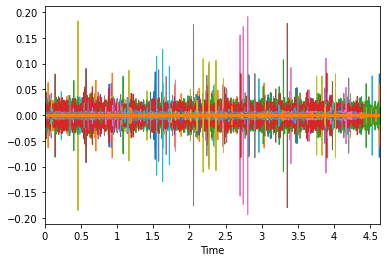

In [66]:
for i in myFiles:
        x,sr=librosa.load(i)
        print(entropy(x))
        librosa.display.waveplot(x, sr=sr)

In [67]:
x,sr=librosa.load("C:/Users/agnap/Dolphin_computation/Dolphin Dataset/Wh_0007.wav")

In [68]:
##plot audio array

In [69]:
import librosa.display

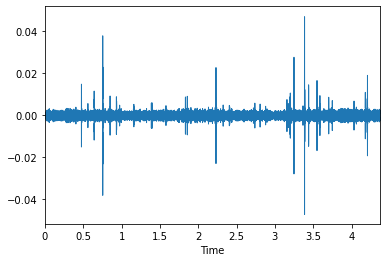

In [70]:
librosa.display.waveplot(x, sr=sr)

In [71]:
x

array([0.0002476 , 0.00053527, 0.00063764, ..., 0.00067887, 0.00130462,
       0.        ], dtype=float32)

In [72]:
sr
print(max(x))
print(x)
print(entropy(x))


0.033432245
[0.0002476  0.00053527 0.00063764 ... 0.00067887 0.00130462 0.        ]
16.554492099612034


In [73]:
IPython.display.Audio(data=x,rate=sr)

In [74]:
##Reduced noise
##https://pypi.org/project/noisereduce/

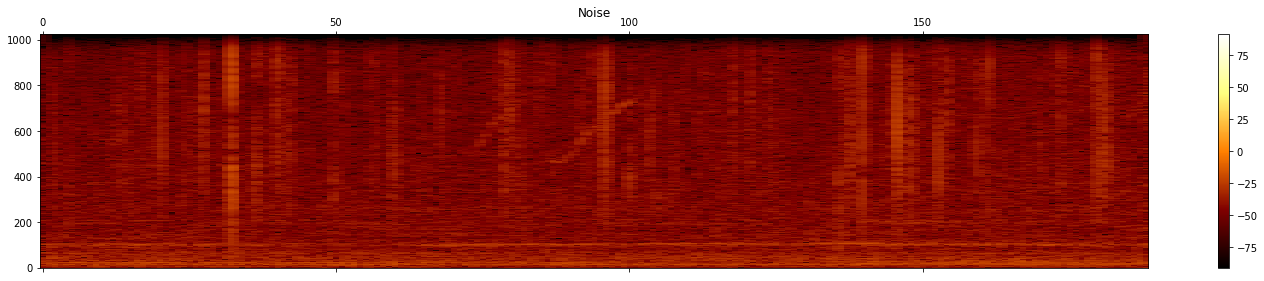

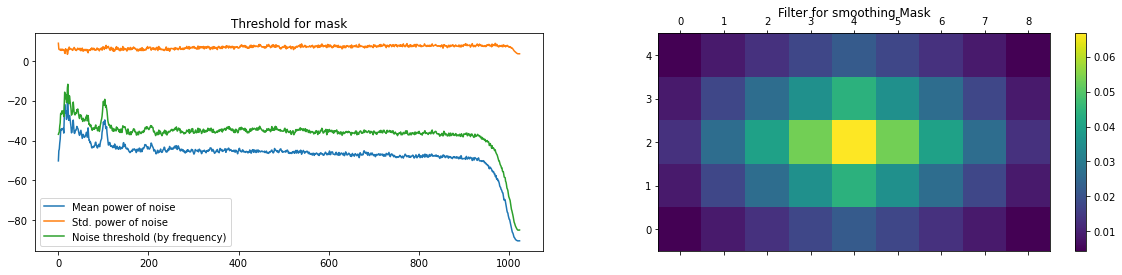

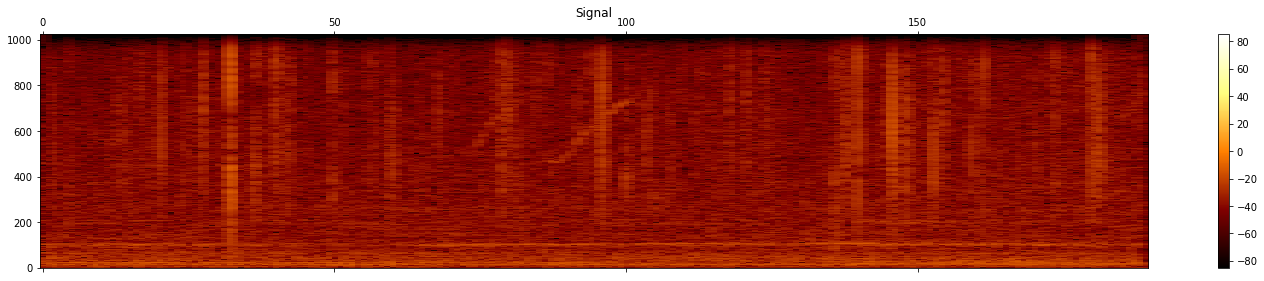

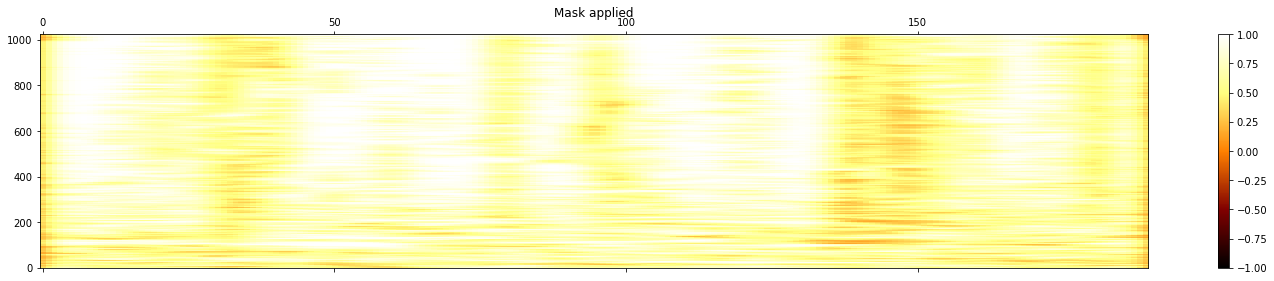

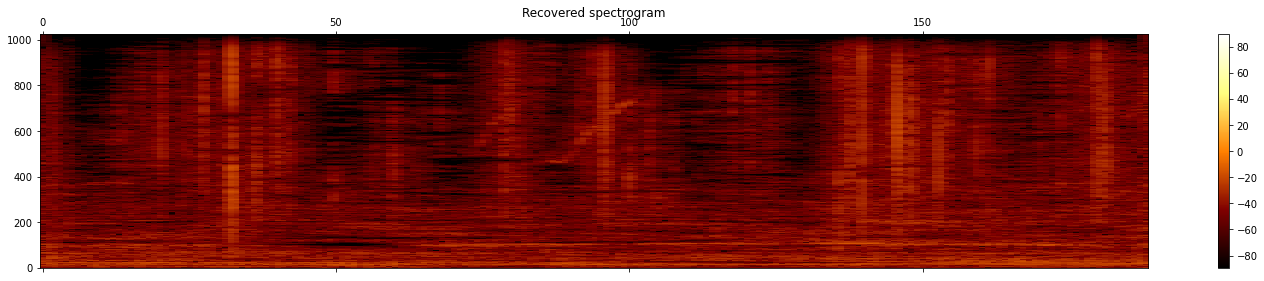

In [75]:
noise_reduced=nr.reduce_noise(audio_clip=x,noise_clip=x/2,verbose=True)

In [77]:
IPython.display.Audio(data=noise_reduced, rate=sr)

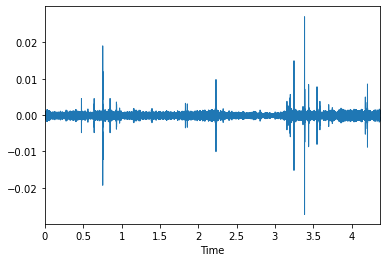

In [78]:
librosa.display.waveplot(noise_reduced, sr=sr)

In [79]:
print(entropy(noise_reduced))

16.556131801144833


In [80]:
##Noise Reduction method 2
##https://www.kaggle.com/mauriciofigueiredo/methods-for-sound-noise-reduction

In [81]:
from scipy import signal

In [82]:
def f_high(y,sr):
    b,a=signal.butter(10,2000/(sr/2),btype='highpass')
    yf=signal.lfilter(b,a,y)
    return yf

In [83]:
yq=f_high(x,sr)

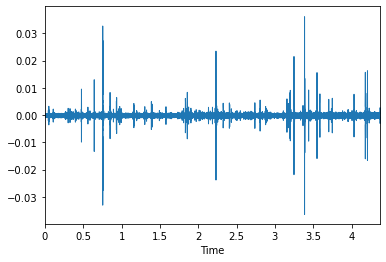

In [84]:
librosa.display.waveplot(yq, sr=sr)

In [85]:
IPython.display.Audio(data=yq, rate=sr)

In [86]:
entropy(yq)

16.556131801144833